# Udacity Data Science Nanodegree
## Author: Jonathan Collier

# <a class="anchor" name="contents">Table of Contents</a>
* [Libraries Used](#libraries)
* [1. Business Understanding](#business_understanding)
    * [Business Questions](#business_questions)
    * [Project Plan](#project_plan)
* [2. Data Understanding](#data_understanding)
    * [Data Quality](#data_quality)
    * [Describe Data](#describe_data)
* [3. Data Preparation](#dataprep)
* [4. Modeling](#modeling)
    * [Where did Republican (GOP) Midterm candidates stand on the results 2020 U.S. Presidential Election?](#question1)
        * [House](#q1_house)
        * [Senate](#q1_senate)
    * [How were Republican (GOP) candidates that fully-denied the election results projected to fare in the midterms?](#question2)
        * [House](#q2_house)
        * [Senate](#q2_senate)
    * [How did Republican (GOP) candidates that fully-denied the election results fare in the midterms?](#question3)
        * [House](#q3_house)
        * [Senate](#q3_senate)
* [5. Evaluation](#evaluation)
* [6. Deployment](#deployment)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import election_pipeline
from IPython.display import Image
from circle_plotter import CirclePlotter, GroupLabel, CircleAttributes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import lines, patches, pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from matplotlib.patheffects import withStroke
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.style.use('default')
%matplotlib inline

# <a class="anchor" name="business_understanding">1. Business Understanding</a>
* [Return to table of contents](#contents)

## <a class="anchor" name="business_questions">Business Questions</a>
<ol>
    <li>Where did GOP candidates in Congress stand on the results of the 2020 election
        prior to the 2022 midterms?</li>
    <li>How were election denier candidates in the Congress projected to fare leading up to the election?</li>
    <li>How did Republican candidates in the House and Senate who fully accepted the election results fare in the Midterms?</li>
</ol>

## <a class="anchor" name="project_plan">Project Plan</a>
    1. Download election-denier data (known source is FiveThiryEight).
    2. Download election-forecasts-2022 (known source is FiveThirtyEight).
    3. Find an API or source for election_result data, or combination of manual entry, depending, it may require a python script and/or manual entry.
    4. Determine features relevant to my business questions from each dataset.
    5. Develop a mapping csv file to relate each dataset.
    6. Create a data pipeline to integrate the data from the different sources and simultaneously clean, feature engineer, etc.
    7. Develop queries and visualizations to answer my business questions.
    8. Write Blog Post with visualizations, image.
    9. Upload repository to GITHUB and create README.md.
    

# <a class="anchor" name="data_understanding">2. Data Understanding</a>
* [Return to table of contents](#contents)

### Datasources:
<table>
    <tr>
        <th>Source</th>
        <th>Content</th>
        <th>Url</th>
        <th>Method</th>
    </tr>
    <tr>
        <td>Five Thirty Eight</td>
        <td>election-deniers</td>
        <td>https://github.com/fivethirtyeight/data/tree/master/election-deniers</td>
        <td>downloaded from website</td>
    </tr>
    <tr>
        <td>Five Thirty Eight</td>
        <td>election-forecasts-2022</td>
        <td>https://github.com/fivethirtyeight/data/tree/master/election-forecasts-2022</td>
        <td>downloaded from website</td>
    </tr>
    <tr>
        <td>NBC</td>
        <td>2022 Midterm House Results</td>
        <td>https://www.nbcnews.com/politics/2022-elections/house-results?</td>
        <td>scraped from website</td>
    </tr>
    <tr>
        <td>NBC</td>
        <td>2022 Midterm Senate Results</td>
        <td>https://www.nbcnews.com/politics/2022-elections/senate-results?</td>
        <td>scraped from website</td>
    </tr>
    
</table>

#### General Information about the 2022 Midterms:
<ul>
    <li>35 Senate races</li>
    <li>435 House races</li>
</ul>
<a href="https://www.theguardian.com/us-news/ng-interactive/2022/nov/15/house-election-results-2022-live-senate-us-midterm-state-map-latest-winners-congress">source</a>

### NBC Election Results
* Consists of election results I scraped from NBC Universal along with some manual entry updates for candidates that were not picked up in the initial scrape.

In [209]:
nbc_election_data = pd.read_csv('data/nbc_election_data.csv')

In [210]:
nbc_election_data.head()

,Unnamed: 0,first_name,last_name,state,state_code,total_votes,percent_total_vote,is_winner,is_incumbent,political_party,race_name,source_url,percent_of_votes_in
0,0,Mary,Peltola,Alaska,AK House 1,137263,55.0,True,True,Dem,"Alaska, House 1",/politics/2022-elections/alaska-house-results,99.0
1,1,Sarah,Palin,Alaska,AK House 1,112471,45.0,False,False,Rep,"Alaska, House 1",/politics/2022-elections/alaska-house-results,99.0
2,2,Nick,Begich,Alaska,AK House 1,0,0.0,False,False,Rep,"Alaska, House 1",/politics/2022-elections/alaska-house-results,99.0
3,3,Chris,Bye,Alaska,AK House 1,0,0.0,False,False,Lib,"Alaska, House 1",/politics/2022-elections/alaska-house-results,99.0
4,4,NaN,Write-ins,Alaska,AK House 1,0,0.0,False,False,other,"Alaska, House 1",/politics/2022-elections/alaska-house-results,99.0


In [19]:
nbc_election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   first_name           1520 non-null   object 
 1   last_name            1520 non-null   object 
 2   state                1520 non-null   object 
 3   state_code           1520 non-null   object 
 4   total_votes          1520 non-null   int64  
 5   percent_total_vote   1520 non-null   float64
 6   is_winner            1520 non-null   bool   
 7   is_incumbent         1520 non-null   bool   
 8   political_party      1520 non-null   object 
 9   race_name            1520 non-null   object 
 10  source_url           1520 non-null   object 
 11  percent_of_votes_in  1520 non-null   float64
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 121.8+ KB


In [18]:
nbc_election_data.nunique()

first_name              582
last_name               997
state                    50
state_code              470
total_votes            1336
percent_total_vote      559
is_winner                 2
is_incumbent              2
political_party           5
race_name               470
source_url               85
percent_of_votes_in      23
dtype: int64

In [260]:
nbc_election_data['state_code'].unique()

array(['AK House 1', 'AL House 1', 'AL House 2', 'AL House 3',
       'AL House 4', 'AL House 5', 'AL House 6', 'AL House 7',
       'AR House 1', 'AR House 2', 'AR House 3', 'AR House 4',
       'AZ House 1', 'AZ House 2', 'AZ House 3', 'AZ House 4',
       'AZ House 5', 'AZ House 6', 'AZ House 7', 'AZ House 8',
       'AZ House 9', 'CA House 1', 'CA House 10', 'CA House 11',
       'CA House 12', 'CA House 13', 'CA House 14', 'CA House 15',
       'CA House 16', 'CA House 17', 'CA House 18', 'CA House 19',
       'CA House 2', 'CA House 20', 'CA House 21', 'CA House 22',
       'CA House 23', 'CA House 24', 'CA House 25', 'CA House 26',
       'CA House 27', 'CA House 28', 'CA House 29', 'CA House 3',
       'CA House 30', 'CA House 31', 'CA House 32', 'CA House 33',
       'CA House 34', 'CA House 35', 'CA House 36', 'CA House 37',
       'CA House 38', 'CA House 39', 'CA House 4', 'CA House 40',
       'CA House 41', 'CA House 42', 'CA House 43', 'CA House 44',
       'CA House 45'

In [8]:
nbc_election_data['state_code'].str.slice(0,2)

0       AK
1       AK
2       AK
3       AK
4       AK
        ..
1529    VT
1530    VT
1531    VT
1532    NV
1533    GA
Name: state_code, Length: 1534, dtype: object

### Five Thirty Eight: election-deniers
* election_deniers data comes from FiveThirtyEight Github repo:
<a href="https://github.com/fivethirtyeight/data/blob/master/election-deniers">election-deniers</a>

In [211]:
election_deniers = pd.read_csv('data/election_deniers.csv')

In [11]:
election_deniers.head()

,Candidate,Incumbent,State,Office,District,Stance,Source,URL,Note
0,Katie Britt,No,Alabama,Senator,NaN,Fully denied,NBC News,https://twitter.com/VaughnHillyard/status/1528...,NaN
1,Jerry Carl,Yes,Alabama,Representative,1,Fully denied,"Congressional roll call, Alabama Political Rep...",https://clerk.house.gov/Votes/202111?Date=01%2...,NaN
2,Barry Moore,Yes,Alabama,Representative,2,Fully denied,Congressional roll call,https://clerk.house.gov/Votes/202111?Date=01%2...,NaN
3,Mike Rogers,Yes,Alabama,Representative,3,Fully denied,Congressional roll call,https://clerk.house.gov/Votes/202111?Date=01%2...,NaN
4,Robert Aderholt,Yes,Alabama,Representative,4,Fully denied,Congressional roll call,https://clerk.house.gov/Votes/202111?Date=01%2...,NaN


Reviewing the different Offices in the dataset:
(my business questions are concerned with candidates running 
for the House of Representatives and Senate)

In [12]:
election_deniers['Office'].unique()

array(['Senator', 'Representative', 'Governor', 'Attorney general',
       'Secretary of state', 'Senator (unexpired term)'], dtype=object)

In [13]:
election_deniers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Candidate  552 non-null    object
 1   Incumbent  552 non-null    object
 2   State      552 non-null    object
 3   Office     552 non-null    object
 4   District   424 non-null    object
 5   Stance     552 non-null    object
 6   Source     450 non-null    object
 7   URL        389 non-null    object
 8   Note       10 non-null     object
dtypes: object(9)
memory usage: 38.9+ KB


In [14]:
election_deniers.nunique()

Candidate    552
Incumbent      2
State         50
Office         6
District      53
Stance         6
Source       223
URL          285
Note           4
dtype: int64

### Five Thirty Eight: election-forecasts-2022
* election-forecasts-2022 data (senate_state_toplines_2022 & house_state_toplines_2022) comes from FiveThirtyEight Github repo: <a href="https://github.com/fivethirtyeight/data/tree/master/election-forecasts-2022">election-forecasts-2022</a>

My analysis is focusing on the following csv files in election-forecasts-2022 GitHub repository:

* <b>senate_state_toplines_2022.csv</b>
* <b>house_state_toplines_2022.csv</b>

I am interested in the following fields within each dataset:
<ol>
    <li><b>cycle</b>: Election cycle year</li>
    <li><b>branch</b>: Branch of Congress (House, Representative)</li>
    <li><b>district</b>: </li>
    <li><b>expression</b>: corresponds to Model type (lite, classic, deluxe) -> I'll focus on predictions from the deluxe model</li>
    <li><b>name_D1</b> (`D1`, `D2`, `D3`, `D4`, `R1`, `R2`, `R3`, `R4`): Name of top four Democrats and Republicans in 
    contention for the seat. </li>
    <li><b>name_I1</b>: Top candidate that is neither Democrat or Republican </li>
    <li><b>winner_XX</b>, where XX is one of (`D1`, `D2`, `D3`, `D4`, `R1`, `R2`, `R3`, `R4`): Chance that the correspondingly named candidate wins the seat</li>
    <li><b>winner_Dparty</b>: Chance the corresponding party, regardless of candidate, wins the seat</li>
    <li><b>winner_Rparty</b>: Chance the corresponding party, regardless of candidate, wins the seat</li>
</ol>

In [212]:
senate_state_toplines = pd.read_csv('data/senate_state_toplines_2022.csv')

In [213]:
house_district_toplines = pd.read_csv('data/house_district_toplines_2022.csv', low_memory=False)

In [214]:
combined_toplines = pd.concat([house_district_toplines, senate_state_toplines], axis=0).reset_index()

In [215]:
combined_toplines.head()

,index,cycle,branch,district,forecastdate,expression,name_D1,name_D2,name_D3,name_D4,...,wonrunoff_R2,lostrunoff_R2,wonrunoff_R3,lostrunoff_R3,wonrunoff_R4,lostrunoff_R4,wonrunoff_I1,lostrunoff_I1,simulations,timestamp
0,0,2022,House,WY-1,11/8/22,_lite,Lynnette GreyBull,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
1,1,2022,House,WV-2,11/8/22,_lite,Barry Lee Wendell,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
2,2,2022,House,WV-1,11/8/22,_lite,Lacy Watson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
3,3,2022,House,WI-8,11/8/22,_lite,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
4,4,2022,House,WI-7,11/8/22,_lite,Richard Dick Ausman,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022


In [2032]:
combined_toplines['branch'].value_counts()

House     199665
Senate     16065
Name: branch, dtype: int64

In [2033]:
combined_toplines.district.unique()

array(['WY-1', 'WV-2', 'WV-1', 'WI-8', 'WI-7', 'WI-6', 'WI-5', 'WI-4',
       'WI-3', 'WI-2', 'WI-1', 'WA-9', 'WA-8', 'WA-7', 'WA-6', 'WA-5',
       'WA-4', 'WA-3', 'WA-2', 'WA-1', 'WA-10', 'VT-1', 'VA-9', 'VA-8',
       'VA-7', 'VA-6', 'VA-5', 'VA-4', 'VA-3', 'VA-2', 'VA-1', 'VA-11',
       'VA-10', 'UT-4', 'UT-3', 'UT-2', 'UT-1', 'TX-9', 'TX-8', 'TX-7',
       'TX-6', 'TX-5', 'TX-4', 'TX-38', 'TX-37', 'TX-36', 'TX-35',
       'TX-34', 'TX-33', 'TX-32', 'TX-3', 'TX-31', 'TX-30', 'TX-29',
       'TX-28', 'TX-27', 'TX-26', 'TX-25', 'TX-24', 'TX-23', 'TX-22',
       'TX-2', 'TX-21', 'TX-20', 'TX-19', 'TX-18', 'TX-17', 'TX-16',
       'TX-15', 'TX-14', 'TX-13', 'TX-12', 'TX-1', 'TX-11', 'TX-10',
       'TN-9', 'TN-8', 'TN-7', 'TN-6', 'TN-5', 'TN-4', 'TN-3', 'TN-2',
       'TN-1', 'SD-1', 'SC-7', 'SC-6', 'SC-5', 'SC-4', 'SC-3', 'SC-2',
       'SC-1', 'RI-2', 'RI-1', 'PA-9', 'PA-8', 'PA-7', 'PA-6', 'PA-5',
       'PA-4', 'PA-3', 'PA-2', 'PA-17', 'PA-16', 'PA-15', 'PA-14',
       'PA-13', 'P

In [2037]:
combined_toplines['expression'].unique()

array(['_lite', '_deluxe', '_classic'], dtype=object)

In [2038]:
pd.to_datetime(combined_toplines['forecastdate']).max()

Timestamp('2022-11-08 00:00:00')

In [2039]:
combined_toplines['winner_D1']

0         0.000825
1         0.000500
2         0.000725
3         0.000000
4         0.006075
            ...   
215725    0.993750
215726    0.730825
215727    0.000200
215728    0.000800
215729    0.051325
Name: winner_D1, Length: 215730, dtype: float64

In [9]:
combined_toplines.head()

,index,cycle,branch,district,forecastdate,expression,name_D1,name_D2,name_D3,name_D4,...,wonrunoff_R2,lostrunoff_R2,wonrunoff_R3,lostrunoff_R3,wonrunoff_R4,lostrunoff_R4,wonrunoff_I1,lostrunoff_I1,simulations,timestamp
0,0,2022,House,WY-1,11/8/22,_lite,Lynnette GreyBull,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
1,1,2022,House,WV-2,11/8/22,_lite,Barry Lee Wendell,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
2,2,2022,House,WV-1,11/8/22,_lite,Lacy Watson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
3,3,2022,House,WI-8,11/8/22,_lite,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022
4,4,2022,House,WI-7,11/8/22,_lite,Richard Dick Ausman,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000,00:12:39 8 Nov 2022


In [162]:
senate_state_toplines['expression'].unique()

array(['_lite', '_deluxe', '_classic'], dtype=object)

# <a class="anchor" name="dataprep">3. Data Preparation</a>
* [Return to table of contents](#contents)

I am going to combine the following datasets into a sqlite relational database:
<ul>
    <li>nbc_election_data</li>
    <li>election_deniers</li>
    <li>combined_toplines</li>
</ul>
This will make the data easier to work with versus solely using Pandas. Here are how the datasets relate together initially. The formatting of the field candidate (or first_name, last_name in the case of nbc_election_data) in each file is not a clean match so I made a <b>name_mappings.csv</b> file to establish the relationship between each dataset.

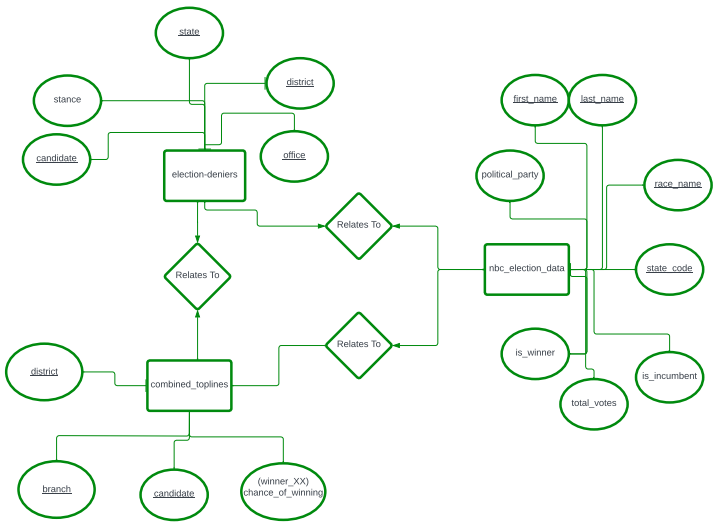

In [2]:
Image(filename='elections_erd.png')

I am going to create an Extract, Transform, Load (ETL) process to select, integrate, and clean the data using pandas, and load each dataset into sqlite. The goal is for the selected and cleansed data to flow into the following tables: 

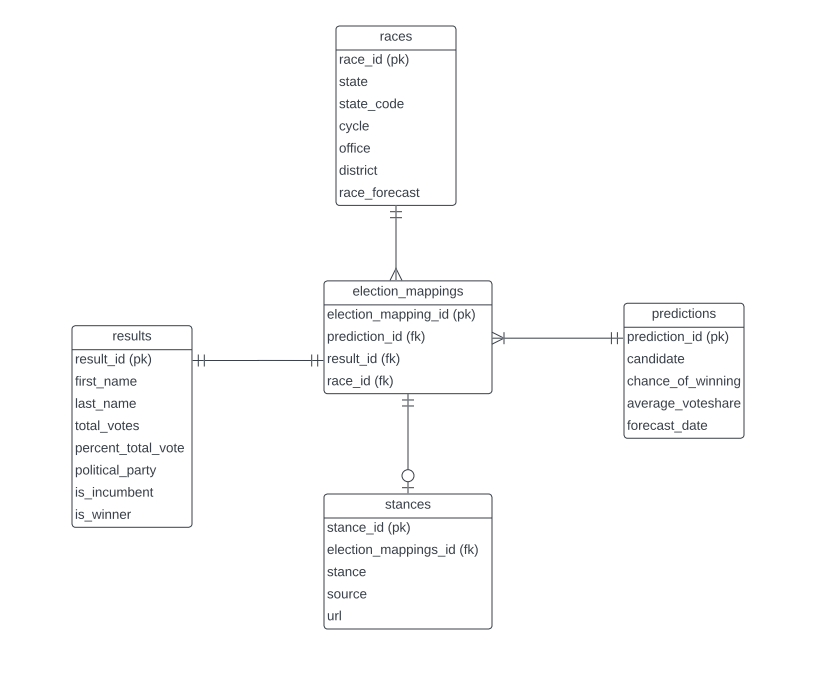

In [3]:
Image('elections_final_erd.png')

I created a class called <b>ElectionPipeline</b> in a separate python file that performs Data Selection, Feature Engineering, Data Cleaning, and Data Integration, and I'm importing this file into my Jupyter notebook. 


Once initialized the data will load from each csv into a DataFrame. Each DataFrame is cleaned and some feature engineering is performed prior to the resulting DataFrame being assigned to the class instance attribute called source_csvs. Instantiating the class below performs this step:

In [2]:
ep = election_pipeline.ElectionPipeline(database='data\elections.db')

The method below creates the sqlite database in the following location 'data\elections.db' and loads each DataFrame into a table within the database:

In [3]:
# Creating database and loading Source tables from collection of CSV files
ep.create_database()

The step below creates the destination tables:

In [4]:
# Creating destination tables (tables: races, predictions, results, election_mappings, stances)
ep.run_step(key='create_tables')

This step creates a staging table that is used to load the database:

In [5]:
# Creating a staging table to load destination tables
ep.run_step(key='create_staging_table')

table elections_stage already exists


This step is used load the initial set of destination tables:

In [6]:
# Loading initial tables (tables: races, predictions, results, stances)
ep.run_step(key='load_tables')

This steps loads the final destination table:

In [7]:
# Loading election_mappings table
ep.run_step(key='update_tables')

duplicate column name: race_forecast


Now that the data is integrated, I can run run queries against the database like so:

In [115]:
ep.run_query('SELECT * FROM races')

,race_id,state,state_code,cycle,office,district,race_forecast
0,1,Alaska,AK,2022,House,1,Toss-Up
1,2,Alabama,AL,2022,House,1,Solid-R
2,3,Alabama,AL,2022,House,2,Solid-R
3,4,Alabama,AL,2022,House,3,Solid-R
4,5,Alabama,AL,2022,House,4,Solid-R
...,...,...,...,...,...,...,...
465,466,South Carolina,SC,2022,Senate,S3,Solid-R
466,467,Idaho,ID,2022,Senate,S3,Solid-R
467,468,Nevada,NV,2022,Senate,S3,Toss-Up
468,469,Vermont,VT,2022,Senate,S3,Solid-D


In [116]:
# Testing that database build was successful
# Checking the count of records in `results` matches the count of records in `nbc_election_data`
assert ep.run_query('SELECT COUNT(*) FROM results').values == ep.run_query('SELECT COUNT(*) FROM nbc_election_data').values

# Checking the count of records in `stances` matches the count of records in `election_deniers`
assert ep.run_query('SELECT COUNT(*) FROM stances').values == ep.run_query('SELECT COUNT(*) FROM election_deniers').values

# Checking the count of records in `name_mappings` matches the count of records in `election_mappings`
assert ep.run_query('SELECT COUNT(*) FROM name_mappings').values == ep.run_query('SELECT COUNT(*) FROM election_mappings').values

# Checking the distinct number of races in `nbc_election_data` matches the count of records in `races`
assert ep.run_query('''SELECT COUNT(*) FROM (SELECT DISTINCT state_code, office, district FROM nbc_election_data)''').values == \
       ep.run_query('''SELECT COUNT(*) FROM races''').values

# Checking the distinct number of prediction_ids in `election_mappings` matches the count of records in `predictions`
assert ep.run_query('''SELECT COUNT(*) FROM (SELECT DISTINCT em.prediction_id FROM election_mappings em)''').values == \
       ep.run_query('''SELECT COUNT(*) FROM predictions''').values

# <a class="anchor" name="modeling">4. Modeling</a>
* [Return to table of contents](#contents)

#### <a class="anchor" name="question1">Where did Republican (GOP) Midterm candidates stand on the results 2020 U.S. Presidential Election?</a>

#### <a class="anchor" name="q1_house">House</a>

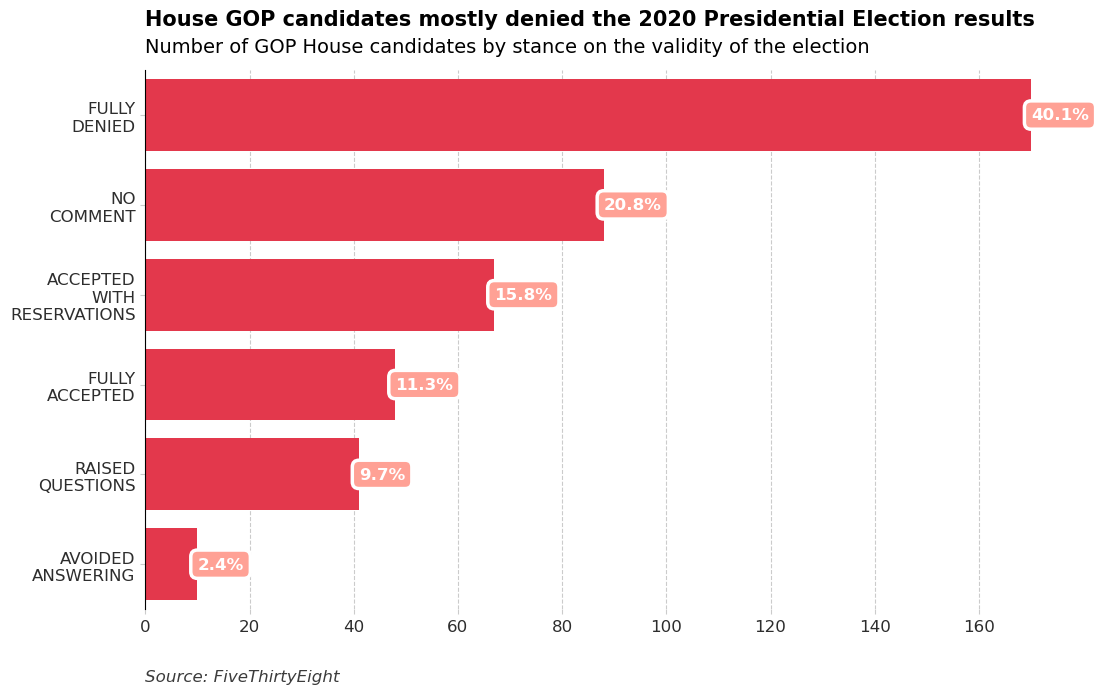

In [121]:
# Querying to get a count of candidates by stance.
result = ep.run_query('''
                        SELECT stance, 
                               COUNT(*) as count
                        FROM races r
                        JOIN election_mappings em
                        ON r.race_id = em.race_id
                        JOIN stances s
                        ON s.election_mapping_id = em.election_mapping_id
                        JOIN predictions p 
                        ON p.prediction_id = em.prediction_id
                        JOIN results rs
                        ON rs.result_id = em.result_id
                        WHERE r.office = 'House'
                        GROUP BY stance
                        ORDER BY COUNT(*) DESC''')

# Adding percentage 
result['percentage'] = result['count']/result['count'].sum() 

# Creating figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Creating barplot
sns.barplot(data=result, x='count', y='stance', color='#ff1c36', ax=ax)

# Adjusting properties of the axis
ax.set_axisbelow(True)
ax.grid(axis ='x', which='major', color='#cbcbcb', lw=.8, linestyle='--')
ax.spines[['right', 'bottom', 'top']].set_visible(False)
ax.set(ylabel=None, xlabel=None)

# Adding percentages 
for row in result.itertuples():
    label_text = ax.text(s='{}%'.format(round(row.percentage * 100, 1)), x=row.count, y=row.Index, 
                         color='white', fontfamily='sans-serif', fontsize=12, fontweight='bold', 
                         va='center', ha='left',
                         bbox=dict(facecolor='#ffa195', edgecolor='white', boxstyle='round', lw=2.5, pad=.4))

# Adding yticks and ylabels
y_pos = np.arange(len(result))
ax.set_yticks(y_pos, labels=result['stance'].apply(lambda stance: stance.upper().replace(' ', '\n')),
              ha='right', fontfamily='sans-serif', fontsize=12, color='#2d2d2d')

# Adjusting font properties of xticks
plt.xticks(fontsize=12, fontfamily='sans-serif', color='#2d2d2d')

# Adjusting the color of the tick_params
plt.tick_params(axis='x', color='#cbcbcb')
plt.tick_params(axis='y', color='#cbcbcb')

# Add suptitle
suptitle = ax.text(s='House GOP candidates mostly denied the 2020 Presidential Election results', x=0, y=-1, 
                   fontsize=15, fontfamily='sans-serif', fontweight='bold')

# Add title
title = ax.text(s='Number of GOP House candidates by stance on the validity of the election', x=0, y=-.7,
                fontsize=14, fontfamily='sans-serif')

# Add source
source = ax.text(s='Source: FiveThirtyEight', x=0, y=6.3, size=12, fontfamily='sans-serif', 
                 color='#3b3b3b', style='italic')

# Save figure
plt.savefig('plots/House_GOP_ElectionStances.png', format='png', bbox_inches='tight')

#### <a class="anchor" name="q1_senate">Senate</a>

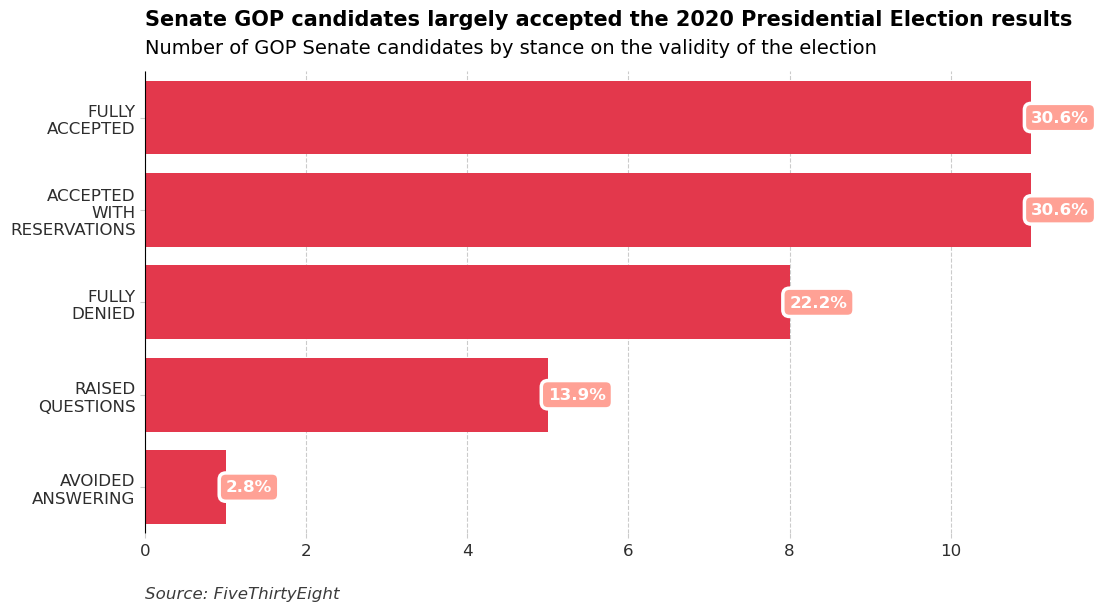

In [120]:
# Querying to get a count of candidates by stance
result = ep.run_query('''
                        SELECT stance, COUNT(*) as count
                        FROM races r
                        JOIN election_mappings em
                        ON r.race_id = em.race_id
                        JOIN stances s
                        ON s.election_mapping_id = em.election_mapping_id
                        JOIN predictions p 
                        ON p.prediction_id = em.prediction_id
                        WHERE r.office = 'Senate'
                        GROUP BY stance
                        ORDER BY COUNT(*) DESC''')

# Calculating the percentage of candidates with a stance
result['percentage'] = result['count']/result['count'].sum() 

# Creating figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Creating barplot
sns.barplot(x=result['count'], y=result['stance'], color='#ff1c36', ax=ax)

# Adjusting properties of the axis
ax.set_axisbelow(True)
ax.grid(axis ='x', color='#cbcbcb', lw=.8, linestyle='--')
ax.spines[['right', 'top', 'bottom']].set_visible(False)
ax.spines['left'].set_capstyle('butt')
ax.set(ylabel=None, xlabel=None)

# Adding labels with percentage of candidates
for row in result.itertuples():
    label_text = ax.text(
        row.count,
        row.Index, '{}%'.format(round(row.percentage * 100, 1)), 
        color='white', 
        fontfamily='sans-serif', 
        fontsize=12, 
        fontweight='bold',
        va='center',
        ha='left',
        bbox=dict(facecolor='#ffa195', edgecolor='white', boxstyle='round', lw=2.5, pad=.4)
    )

# Adding yticks and ylabels
y_pos = np.arange(len(result))
ax.set_yticks(y_pos, 
              labels=result['stance'].apply(lambda stance: stance.upper().replace(' ', '\n')),
              ha='right', fontfamily='sans-serif', fontsize=12, color='#2d2d2d')

# Adjusting font properties of xticks
plt.xticks(fontsize=12, fontfamily='sans-serif', color='#2d2d2d')

# Adjusting the color of the tick_params
plt.tick_params(axis='x', color='#cbcbcb')
plt.tick_params(axis='y', color='#cbcbcb')

# Add suptitle
suptitle = ax.text(x=0, y=-1, s='Senate GOP candidates largely accepted the 2020 Presidential Election results', 
                   fontsize=15, fontfamily='sans-serif', fontweight='bold')

# Add title
title = ax.text(x=0, y=-.7, s='Number of GOP Senate candidates by stance on the validity of the election',
                fontsize=14, fontfamily='sans-serif')

# Add source
source = ax.text(s='Source: FiveThirtyEight', x=0, y=5.2, size=12, color='#3b3b3b', style='italic')

# Save figure
plt.savefig('plots/Senate_GOP_ElectionStances.png', format='png', bbox_inches='tight')

#### <a class="anchor" name="question2">How were Republican (GOP) candidates that fully-denied the election results projected to fare in the midterms?</a>

#### <a class="anchor" name="q2_house">House</a>

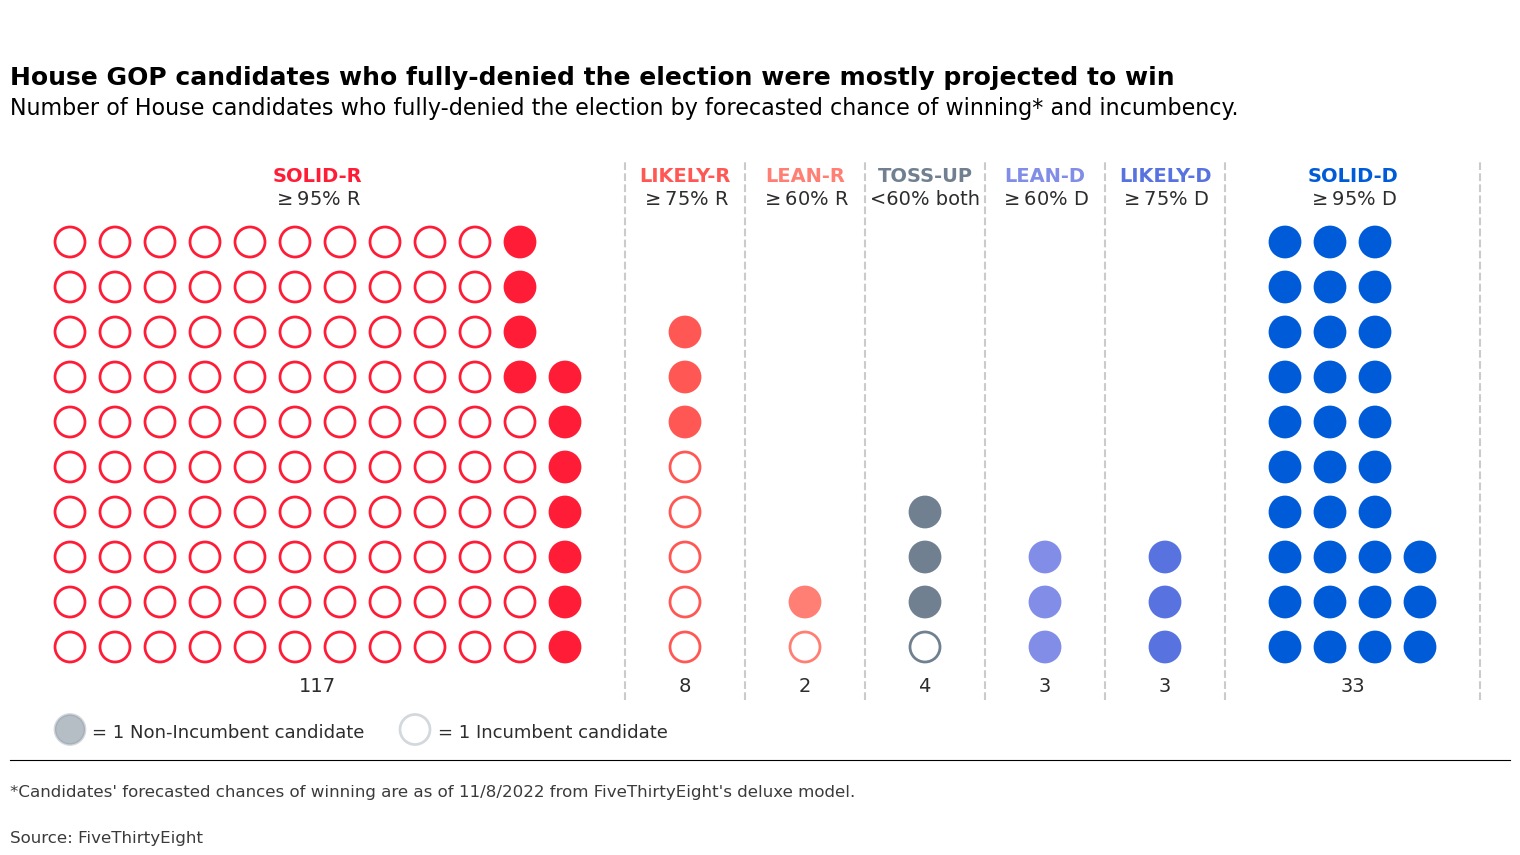

In [126]:
# Getting the data for plotting.
result = ep.run_query("""
    SELECT 
        CASE 
        WHEN race_forecast IN ('Solid-R', 'Likely-R', 'Lean-R') THEN
            CASE 
            WHEN chance_of_winning >= .95 THEN 'Solid-R'
            WHEN chance_of_winning >= .75 THEN 'Likely-R'
            WHEN chance_of_winning >= .60 THEN 'Lean-R'
            ELSE race_forecast END
        ELSE
            race_forecast 
        END AS candidate_forecast,
        (SELECT is_incumbent FROM results rs WHERE rs.result_id = em.result_id) AS is_incumbent
    FROM stances s
    JOIN election_mappings em
    ON s.election_mapping_id = em.election_mapping_id
    JOIN races r
    ON r.race_id = em.race_id
    JOIN predictions p 
    ON p.prediction_id = em.prediction_id
    WHERE stance = 'Fully denied'
    AND r.office = 'House'
    ORDER BY
         CASE 
         WHEN candidate_forecast = 'Solid-R' THEN 1
         WHEN candidate_forecast = 'Likely-R' THEN 2
         WHEN candidate_forecast = 'Lean-R' THEN 3
         WHEN candidate_forecast = 'Toss-Up' THEN 4
         WHEN candidate_forecast = 'Lean-D' THEN 5
         WHEN candidate_forecast = 'Likely-D' THEN 6
         ELSE 7 END
    """)

# Instantiating the CirclePlotter class.
cp = CirclePlotter(radius=.2, x_init=0, y_init=1.5, circles_per_column=10, 
                   plot_attributes={'Solid-R': ['#ff1c36', 1, '$\geq$95% R'],
                                    'Likely-R': ['#ff5854', 1, '$\geq$75% R'],
                                    'Lean-R': ['#ff7f74', 1, '$\geq$60% R'],
                                    'Toss-Up': ['#708090', 1, '<60% both'],
                                    'Lean-D': ['#818de7', 1, '$\geq$60% D'],
                                    'Likely-D': ['#5873e0', 1, '$\geq$75% D'],
                                    'Solid-D': ['#005bd9', 1, '$\geq$95% D']})

# Creating a figure.
fig = plt.figure(figsize=(20, 10))

# Adding and adjusting properties of the axis.
ax = fig.add_axes([.1, .2, .75, .75], aspect=1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.set(xticks=[], yticks=[])

# Adding sup title.
suptitle = ax.text(s="House GOP candidates who fully-denied " 
                      "the election were mostly projected to win",
                    x=0, 
                    y=9, 
                    size=18, 
                    fontfamily='sans-serif', 
                    fontweight='bold')

# Adding a title.
title = ax.text(s="Number of House candidates who fully-denied the election " 
                    "by forecasted chance of winning* and incumbency.", 
                 x=0, 
                 y=8.6, 
                 size=16, 
                 fontfamily='sans-serif')

# Adding a note.
note = ax.text(s="*Candidates' forecasted chances of winning are as of " 
                  "11/8/2022 from FiveThirtyEight's deluxe model.", 
                x=0, 
                y=-.5, 
                size=12, 
                fontfamily='sans-serif', 
                color='#3b3b3b')

# Adding source information.
source = ax.text(s='Source: FiveThirtyEight', x=0, y=-1.1, 
                  size=12, fontfamily='sans-serif', color='#3b3b3b')


for point in cp.circle_generator(input_data=result, 
                                 group='candidate_forecast',
                                 order=['is_incumbent']):
        
        # Adding each circle to the plot.
        if isinstance(point, CircleAttributes):
            if point.row.is_incumbent == 0:
                facecolor = cp.plot_attributes[point.group].color
            else:
                facecolor = 'white'
                
            c = cp.create_circle(x=point.x, 
                                 y=point.y, 
                                 edgecolor=cp.plot_attributes[point.group].color, 
                                 facecolor=facecolor, 
                                 alpha=1)
            ax.add_artist(c)
            
        if isinstance(point, GroupLabel):
            # Adding forecasted group (e.g., Solid-R,...,Solid-D).
            ax.text(s='{}'.format(point.group_label).upper(), 
                     x=point.label_x, 
                     y=point.label_y + .2, 
                     size=14, 
                     fontfamily='sans-serif', 
                     color=cp.plot_attributes[point.group_label].color, 
                     ha='center', fontweight='bold')
            
            # Adding corresponding chance of winning (e.g., >= 95% R).
            ax.text(s='{}'.format(point.group_sublabel), 
                     x=point.label_x, 
                     y=point.label_y -.1, 
                     size=14, 
                     fontfamily='sans-serif', 
                     color='#2d2d2d', 
                     ha='center')
            
            # Adding number of candidates in group.
            ax.text(s='{}'.format(point.group_count), 
                     x=point.label_x, 
                     y=.9,
                     size=14, 
                     fontfamily='sans-serif', 
                     ha='center', 
                     color='#2d2d2d', 
                     weight='normal')

            # Adds dotted line between groups.
            ax.axvline(x=point.gridline_x, 
                        color='#cbcbcb', 
                        linestyle='--', 
                        ymin=.08, 
                        ymax=.8)
            
# Adding example labels.
unit_shape = ax.add_artist(cp.create_circle(x=.8, 
                                            y=0.4, 
                                            edgecolor='#708090', 
                                            facecolor='#708090', 
                                            alpha=.3))

unit_label = ax.text(s='= 1 Non-Incumbent candidate', 
                     x=1.1, 
                     y=0.3, 
                     fontfamily='sans-serif', 
                     size=13, 
                     color='#2d2d2d', 
                     fontweight = 'light')     

unit_shape = ax.add_artist(cp.create_circle(x=5.4, 
                                            y=0.4, 
                                            edgecolor='#708090', 
                                            facecolor='white', 
                                            alpha=.3))

unit_label = ax.text(s='= 1 Incumbent candidate', 
                     x=5.7, 
                     y=0.3, 
                     fontfamily='sans-serif', 
                     size=13, 
                     color='#2d2d2d', 
                     fontweight = 'light') 
# Saving the plot.
plt.savefig('plots/House_ElectionDenier_Predictions.png', format='png', bbox_inches='tight')

#### <a class="anchor" name="q2_senate">Senate</a>

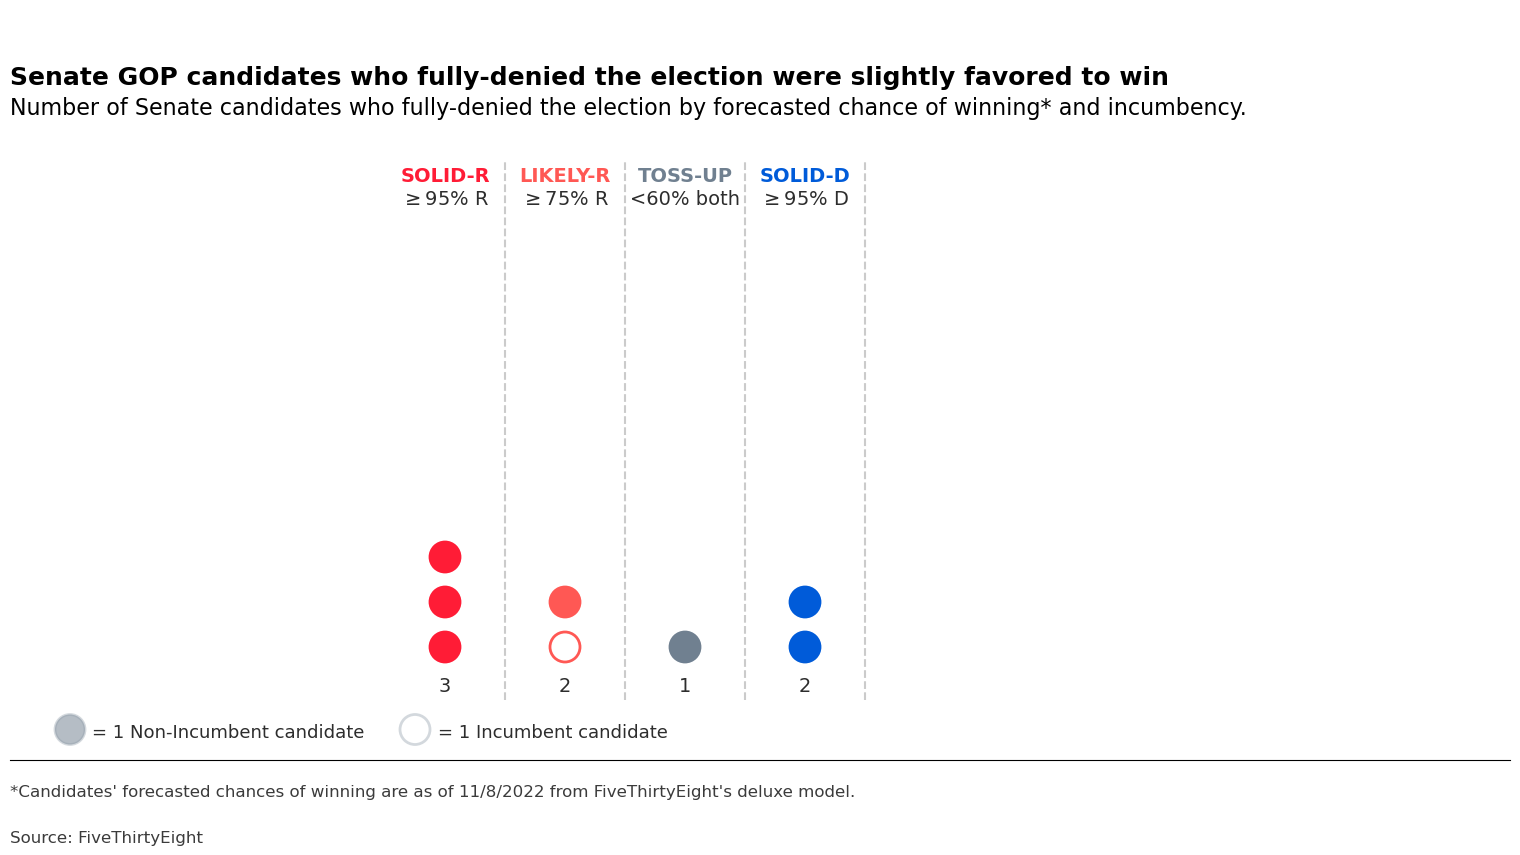

In [127]:
# Getting the data for plotting.
result = ep.run_query("""
    SELECT 
        CASE 
        WHEN race_forecast IN ('Solid-R', 'Likely-R', 'Lean-R') THEN
            CASE 
            WHEN chance_of_winning >= .95 THEN 'Solid-R'
            WHEN chance_of_winning >= .75 THEN 'Likely-R'
            WHEN chance_of_winning >= .60 THEN 'Lean-R'
            ELSE race_forecast END
        ELSE
            race_forecast 
        END AS candidate_forecast,
        (SELECT is_incumbent FROM results rs WHERE rs.result_id = em.result_id) AS is_incumbent
    FROM stances s
    JOIN election_mappings em
    ON s.election_mapping_id = em.election_mapping_id
    JOIN races r
    ON r.race_id = em.race_id
    JOIN predictions p 
    ON p.prediction_id = em.prediction_id
    WHERE stance = 'Fully denied'
    AND r.office = 'Senate'
    ORDER BY
         CASE 
         WHEN candidate_forecast = 'Solid-R' THEN 1
         WHEN candidate_forecast = 'Likely-R' THEN 2
         WHEN candidate_forecast = 'Lean-R' THEN 3
         WHEN candidate_forecast = 'Toss-Up' THEN 4
         WHEN candidate_forecast = 'Lean-D' THEN 5
         WHEN candidate_forecast = 'Likely-D' THEN 6
         ELSE 7 END
    """)

# Instantiating the CirclePlotter class.
cp = CirclePlotter(radius=.2, x_init=5, y_init=1.5, circles_per_column=10, 
                   plot_attributes={'Solid-R': ['#ff1c36', 1, '$\geq$95% R'],
                                    'Likely-R': ['#ff5854', 1, '$\geq$75% R'],
                                    'Lean-R': ['#ff7f74', 1, '$\geq$60% R'],
                                    'Toss-Up': ['#708090', 1, '<60% both'],
                                    'Lean-D': ['#818de7', 1, '$\geq$60% D'],
                                    'Likely-D': ['#5873e0', 1, '$\geq$75% D'],
                                    'Solid-D': ['#005bd9', 1, '$\geq$95% D']})

# Creating a figure.
fig = plt.figure(figsize=(20, 10))

# Adding and adjusting properties of the axis.
ax = fig.add_axes([.1, .2, .75, .75], aspect=1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.set(xticks=[], yticks=[])


# Adding sup title.
suptitle = ax.text(s="Senate GOP candidates who fully-denied "
                      "the election were slightly favored to win",
                    x=0, y=9, size=18, fontfamily='sans-serif', fontweight='bold')

# Adding a title.
title = ax.text(s="Number of Senate candidates who fully-denied the election " 
                    "by forecasted chance of winning* and incumbency.", 
                 x=0, 
                 y=8.6, 
                 size=16, 
                 fontfamily='sans-serif')

# Adding a note.
note = ax.text(s="*Candidates' forecasted chances of winning are as of " 
                  "11/8/2022 from FiveThirtyEight's deluxe model.", 
                x=0, 
                y=-.5, 
                size=12, 
                fontfamily='sans-serif', 
                color='#3b3b3b')

# Adding source information.
source = ax.text(s='Source: FiveThirtyEight', x=0, y=-1.1, 
                  size=12, fontfamily='sans-serif', color='#3b3b3b')



for point in cp.circle_generator(input_data=result, 
                                 group='candidate_forecast',
                                 order=['is_incumbent']):
    
        # Adding each circle to the plot.
        if isinstance(point, CircleAttributes):
            if point.row.is_incumbent == 0:
                facecolor = cp.plot_attributes[point.group].color
            else:
                facecolor = 'white'
                
            c = cp.create_circle(x=point.x, 
                                 y=point.y, 
                                 edgecolor=cp.plot_attributes[point.group].color, 
                                 facecolor=facecolor, 
                                 alpha=1)
            ax.add_artist(c)
            
        if isinstance(point, GroupLabel):
            # Adding forecasted group (e.g., Solid-R,...,Solid-D)
            ax.text(s='{}'.format(point.group_label).upper(), 
                     x=point.label_x, 
                     y=point.label_y + .2, 
                     size=14, 
                     fontfamily='sans-serif', 
                     color=cp.plot_attributes[point.group_label].color, 
                     ha='center', fontweight='bold')
            
            # Adding corresponding chance of winning (e.g., >= 95% R)
            ax.text(s='{}'.format(point.group_sublabel), 
                     x=point.label_x, 
                     y=point.label_y -.1, 
                     size=14, 
                     fontfamily='sans-serif', 
                     color='#2d2d2d', 
                     ha='center')
            
            # Adding number of candidates in group
            ax.text(s='{}'.format(point.group_count), 
                     x=point.label_x, 
                     y=.9,
                     size=14, 
                     fontfamily='sans-serif', 
                     ha='center', 
                     color='#2d2d2d', 
                     weight='normal')

            # Adds dotted line between groups
            ax.axvline(x=point.gridline_x, 
                        color='#cbcbcb', 
                        linestyle='--', 
                        ymin=.08, 
                        ymax=.8)

            
# Adding example labels,
unit_shape = ax.add_artist(cp.create_circle(x=.8, 
                                            y=0.4, 
                                            edgecolor='#708090', 
                                            facecolor='#708090', 
                                            alpha=.3))

unit_label = ax.text(s='= 1 Non-Incumbent candidate', 
                     x=1.1, 
                     y=0.3, 
                     fontfamily='sans-serif', 
                     size=13, 
                     color='#2d2d2d', 
                     fontweight='light')     

unit_shape = ax.add_artist(cp.create_circle(x=5.4, 
                                            y=0.4, 
                                            edgecolor='#708090', 
                                            facecolor='white', 
                                            alpha=.3))

unit_label = ax.text(s='= 1 Incumbent candidate', 
                     x=5.7, 
                     y=0.3, 
                     fontfamily='sans-serif', 
                     size=13, 
                     color='#2d2d2d', 
                     fontweight='light') 

# Saving the plot.
plt.savefig('plots/Senate_ElectionDenier_Predictions.png', format='png', bbox_inches='tight')

#### <a class="anchor" name="question2">How did Republican (GOP) candidates that fully-denied the election results fare in the midterms?</a>

#### <a class="anchor" name="q3_house">House</a>

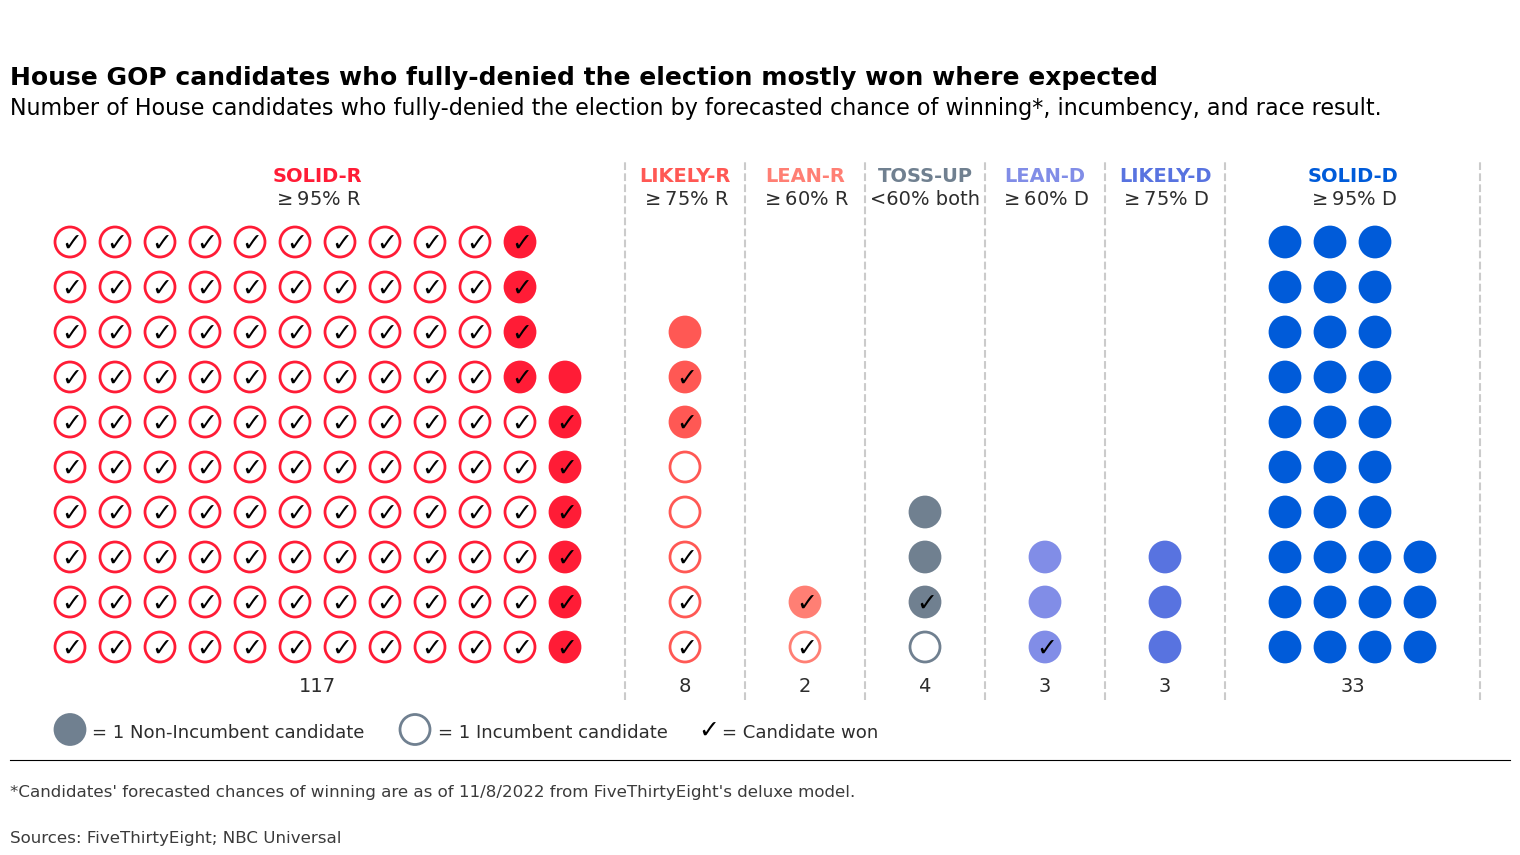

In [130]:
result = ep.run_query('''SELECT 
                               CASE 
                               WHEN race_forecast IN ('Solid-R', 'Likely-R', 'Lean-R') THEN
                                    CASE 
                                    WHEN chance_of_winning >= .95 THEN 'Solid-R'
                                    WHEN chance_of_winning >= .75 THEN 'Likely-R'
                                    WHEN chance_of_winning >= .60 THEN 'Lean-R'
                                    ELSE race_forecast END
                               ELSE race_forecast 
                               END AS candidate_forecast,
                               (SELECT is_winner FROM results rs WHERE rs.result_id = em.result_id) AS is_winner,
                               (SELECT is_incumbent FROM results rs WHERE rs.result_id = em.result_id) AS is_incumbent
                         FROM stances s
                         JOIN election_mappings em
                         ON s.election_mapping_id = em.election_mapping_id
                         JOIN races r
                         ON r.race_id = em.race_id
                         JOIN predictions p 
                         ON p.prediction_id = em.prediction_id
                         WHERE stance = 'Fully denied'
                         AND r.office = 'House'
                         ORDER BY
                                 CASE 
                                 WHEN candidate_forecast = 'Solid-R' THEN 1
                                 WHEN candidate_forecast = 'Likely-R' THEN 2
                                 WHEN candidate_forecast = 'Lean-R' THEN 3
                                 WHEN candidate_forecast = 'Toss-Up' THEN 4
                                 WHEN candidate_forecast = 'Lean-D' THEN 5
                                 WHEN candidate_forecast = 'Likely-D' THEN 6
                                 ELSE 7 END''')              
                
# Instantiating the CirclePlotter class.
cp = CirclePlotter(radius=.2, x_init=0, y_init=1.5, circles_per_column=10, 
                   plot_attributes={'Solid-R': ['#ff1c36', 1, '$\geq$95% R'],
                                    'Likely-R': ['#ff5854', 1, '$\geq$75% R'],
                                    'Lean-R': ['#ff7f74', 1, '$\geq$60% R'],
                                    'Toss-Up': ['#708090', 1, '<60% both'],
                                    'Lean-D': ['#818de7', 1, '$\geq$60% D'],
                                    'Likely-D': ['#5873e0', 1, '$\geq$75% D'],
                                    'Solid-D': ['#005bd9', 1, '$\geq$95% D']})

# Creating a figure
fig = plt.figure(figsize=(20, 10))

# Adding and adjusting properties of the axis.
ax = fig.add_axes([.1, .2, .75, .75], aspect=1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.set(xticks=[], yticks=[])
 
# Adding sup title.
suptitle = ax.text(s="House GOP candidates who fully-denied "
                    "the election mostly won where expected",
                    x=0, 
                    y=9, 
                    size=18, 
                    fontfamily='sans-serif', 
                    fontweight='bold')

# Adding a title.
title = ax.text(s="Number of House candidates who fully-denied "
                 "the election by forecasted chance of winning*, "
                 "incumbency, and race result.", 
                 x=0, y=8.6, size=16, fontfamily='sans-serif')

# Adding a note.
note = ax.text(s="*Candidates' forecasted chances of winning "
                "are as of 11/8/2022 from FiveThirtyEight's deluxe model.", 
                x=0, y=-.5, size=12, fontfamily='sans-serif', color='#3b3b3b')

# Adding sources.
source = ax.text(s='Sources: FiveThirtyEight; NBC Universal', x=0, y=-1.1, 
                  size=12, fontfamily='sans-serif', color='#3b3b3b')



for point in cp.circle_generator(input_data=result, 
                                 group='candidate_forecast',
                                 order=['is_incumbent', 'is_winner']):
    
        # Adding each circle to the plot.
        if isinstance(point, CircleAttributes):
            if point.row.is_incumbent == 0:
                facecolor = cp.plot_attributes[point.group].color
            else:
                facecolor='white'


            if point.row.is_winner == 1:
                ax.text(x=point.x, y=point.y, s='$\checkmark$', color='black', 
                        zorder=12, size=18, ha='center', va='center')

            c = cp.create_circle(x=point.x, 
                                 y=point.y, 
                                 edgecolor=cp.plot_attributes[point.group].color, 
                                 facecolor=facecolor, 
                                 alpha=1)
            ax.add_artist(c)
            
        if isinstance(point, GroupLabel):
            # Adding forecasted group (e.g., Solid-R,...,Solid-D).
            ax.text(s='{}'.format(point.group_label).upper(), x=point.label_x, y=point.label_y+.2, size=14, 
                     fontfamily='sans-serif', color=cp.plot_attributes[point.group_label].color, 
                     ha='center', fontweight='bold')
            
            # Adding corresponding chance of winning (e.g., >= 95% R).
            ax.text(s='{}'.format(point.group_sublabel), x=point.label_x, y=point.label_y-.1, 
                     size=14, fontfamily='sans-serif', color='#2d2d2d', ha='center')
            
            # Adding number of candidates in group.
            ax.text(s='{}'.format(point.group_count), x=point.label_x, y=.9,
                     size=14, fontfamily='sans-serif', ha='center', color='#2d2d2d', 
                     weight='normal')

            # Adding dotted line between groups.
            ax.axvline(x=point.gridline_x, color='#cbcbcb', linestyle='--', ymin=.08, ymax=.8)
        
        
# Adding example labels.
non_incumbent_shape = ax.add_artist(cp.create_circle(x=.8, 
                                                     y=0.4, 
                                                     edgecolor='#708090', 
                                                     facecolor='#708090', 
                                                     alpha=1))

non_incumbent_label = ax.text(s='= 1 Non-Incumbent candidate', 
                              x=1.1, 
                              y=0.3, 
                              fontfamily='sans-serif', 
                              fontsize=13, 
                              color='#2d2d2d', 
                              fontweight='light')     


incumbent_shape = ax.add_artist(cp.create_circle(x=5.4, 
                                                 y=0.4, 
                                                 edgecolor='#708090', 
                                                 facecolor='white', 
                                                 alpha=1))

incumbent_label = ax.text(s='= 1 Incumbent candidate', 
                          x=5.7, 
                          y=0.3, 
                          fontfamily='sans-serif', 
                          fontsize=13, 
                          color='#2d2d2d', 
                          fontweight='light') 

won_shape = ax.text(x=9.3, 
                    y=.4, 
                    s='$\checkmark$', 
                    color='black', 
                    zorder=12, 
                    size=18, 
                    ha='center', 
                    va='center')

won_label = ax.text(x=9.5, 
                    y=.3, 
                    s='= Candidate won', 
                    color='#2d2d2d', 
                    fontfamily='sans-serif', 
                    fontsize=13, 
                    fontweight='light')

# Saving plot.
plt.savefig('plots/House_ElectionDenier_Results.png', format='png', bbox_inches='tight')        

#### <a class="anchor" name="q3_senate">Senate</a>

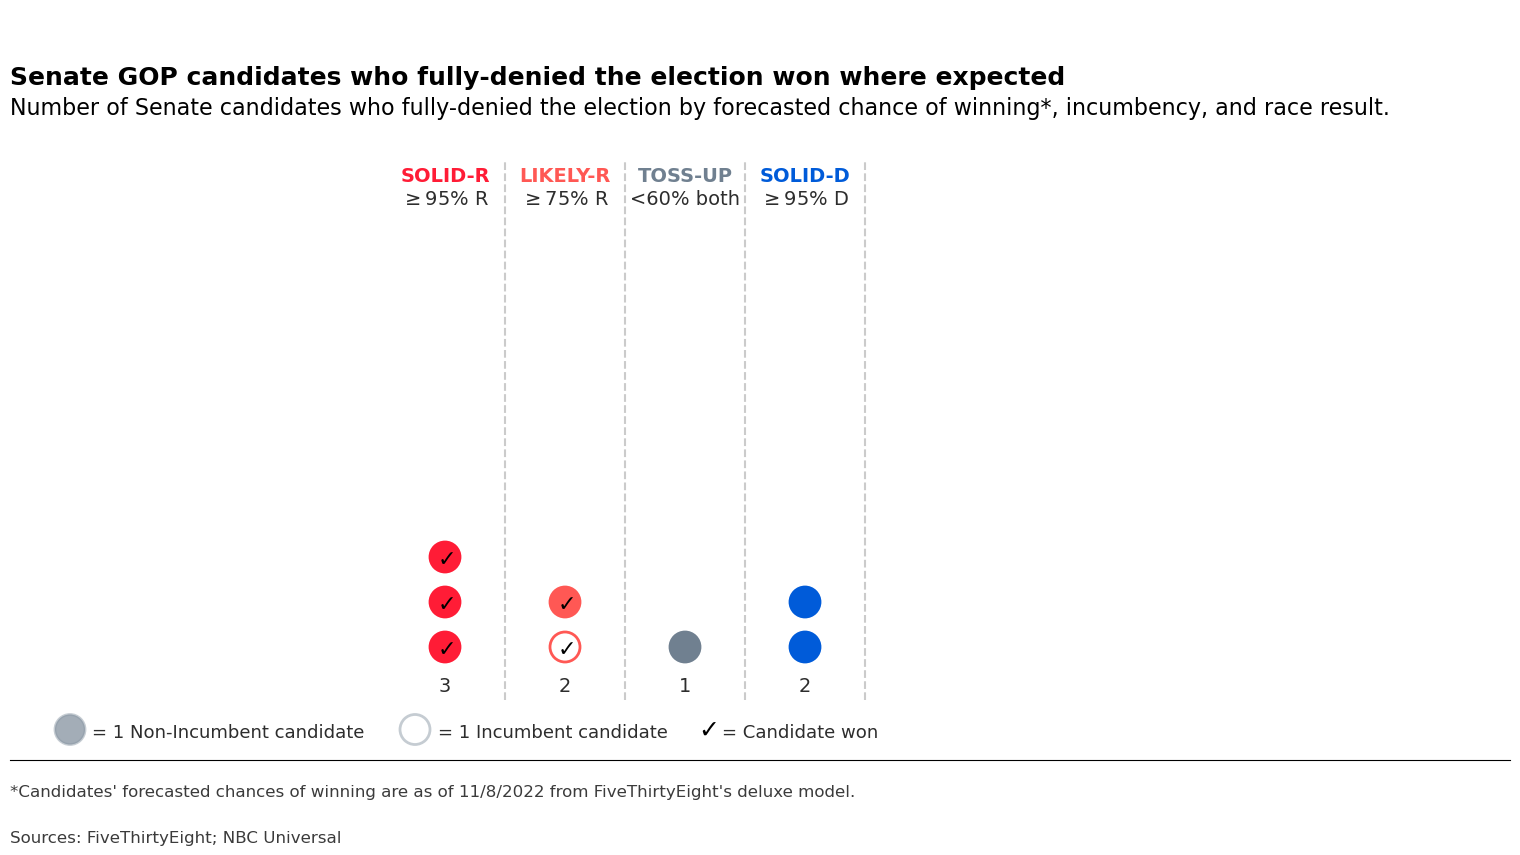

In [132]:
result = ep.run_query("""SELECT 
                               CASE 
                               WHEN race_forecast IN ('Solid-R', 'Likely-R', 'Lean-R') THEN
                                    CASE 
                                    WHEN chance_of_winning >= .95 THEN 'Solid-R'
                                    WHEN chance_of_winning >= .75 THEN 'Likely-R'
                                    WHEN chance_of_winning >= .60 THEN 'Lean-R'
                                    ELSE race_forecast END
                               ELSE race_forecast 
                               END AS candidate_forecast,
                               (SELECT is_winner FROM results rs WHERE rs.result_id = em.result_id) AS is_winner,
                               (SELECT is_incumbent FROM results rs WHERE rs.result_id = em.result_id) AS is_incumbent
                         FROM stances s
                         JOIN election_mappings em
                         ON s.election_mapping_id = em.election_mapping_id
                         JOIN races r
                         ON r.race_id = em.race_id
                         JOIN predictions p 
                         ON p.prediction_id = em.prediction_id
                         WHERE stance = 'Fully denied'
                         AND r.office = 'Senate'
                         ORDER BY
                                 CASE 
                                 WHEN candidate_forecast = 'Solid-R' THEN 1
                                 WHEN candidate_forecast = 'Likely-R' THEN 2
                                 WHEN candidate_forecast = 'Lean-R' THEN 3
                                 WHEN candidate_forecast = 'Toss-Up' THEN 4
                                 WHEN candidate_forecast = 'Lean-D' THEN 5
                                 WHEN candidate_forecast = 'Likely-D' THEN 6
                                 ELSE 7 END""")              
                
# Instantiating the CirclePlotter class.
cp = CirclePlotter(radius=.2, x_init=5, y_init=1.5, circles_per_column=10, 
                   plot_attributes={'Solid-R': ['#ff1c36', 1, '$\geq$95% R'],
                                    'Likely-R': ['#ff5854', 1, '$\geq$75% R'],
                                    'Lean-R': ['#ff7f74', 1, '$\geq$60% R'],
                                    'Toss-Up': ['#708090', 1, '<60% both'],
                                    'Lean-D': ['#818de7', 1, '$\geq$60% D'],
                                    'Likely-D': ['#5873e0', 1, '$\geq$75% D'],
                                    'Solid-D': ['#005bd9', 1, '$\geq$95% D']})

# Creating a figure
fig = plt.figure(figsize=(20, 10))

# Adding and adjusting properties of the axis.
ax = fig.add_axes([.1, .2, .75, .75], aspect=1)
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.set(xticks=[], yticks=[])
 
# Adding sup title.
suptitle = ax.text(s="Senate GOP candidates who fully-denied "
                   "the election won where expected ",
                    x=0, 
                    y=9, 
                    size=18, 
                    fontfamily='sans-serif', 
                    fontweight='bold')

# Adding a title.
title = ax.text(s="Number of Senate candidates who fully-denied "
                 "the election by forecasted chance of winning*, "
                 "incumbency, and race result.", 
                 x=0, y=8.6, size=16, fontfamily='sans-serif')

# Adding a note.
note = ax.text(s="*Candidates' forecasted chances of winning "
                "are as of 11/8/2022 from FiveThirtyEight's deluxe model.", 
                x=0, y=-.5, size=12, fontfamily='sans-serif', color='#3b3b3b')

# Adding sources.
source = ax.text(s='Sources: FiveThirtyEight; NBC Universal', x=0, y=-1.1, 
                  size=12, fontfamily='sans-serif', color='#3b3b3b')



for point in cp.circle_generator(input_data=result, 
                                 group='candidate_forecast',
                                 order=['is_incumbent', 'is_winner']):
    
        # Adding each circle to the plot.
        if isinstance(point, CircleAttributes):
            if point.row.is_incumbent == 0:
                facecolor = cp.plot_attributes[point.group].color
            else:
                facecolor='white'


            if point.row.is_winner == 1:
                ax.text(x=point.x, y=point.y, s='$\checkmark$', color='black', 
                        zorder=12, size=16, ha='center', va='center')

            c = cp.create_circle(x=point.x, 
                                 y=point.y, 
                                 edgecolor=cp.plot_attributes[point.group].color, 
                                 facecolor=facecolor, 
                                 alpha=1)
            ax.add_artist(c)
            
        if isinstance(point, GroupLabel):
            # Adding forecasted group (e.g., Solid-R,...,Solid-D).
            ax.text(s='{}'.format(point.group_label).upper(), x=point.label_x, y=point.label_y+.2, size=14, 
                     fontfamily='sans-serif', color=cp.plot_attributes[point.group_label].color, 
                     ha='center', fontweight='bold')
            
            # Adding corresponding chance of winning (e.g., >= 95% R).
            ax.text(s='{}'.format(point.group_sublabel), x=point.label_x, y=point.label_y-.1, 
                     size=14, fontfamily='sans-serif', color='#2d2d2d', ha='center')
            
            # Adding number of candidates in group.
            ax.text(s='{}'.format(point.group_count), x=point.label_x, y=.9,
                     size=14, fontfamily='sans-serif', ha='center', color='#2d2d2d', 
                     weight='normal')

            # Adding dotted line between groups.
            ax.axvline(x=point.gridline_x, color='#cbcbcb', linestyle='--', ymin=.08, ymax=.8)
        
        
# Adding example labels.
non_incumbent_shape = ax.add_artist(cp.create_circle(x=.8, 
                                                     y=0.4, 
                                                     edgecolor='#708090', 
                                                     facecolor='#708090', 
                                                     alpha=.4))

non_incumbent_label = ax.text(s='= 1 Non-Incumbent candidate', 
                              x=1.1, 
                              y=0.3, 
                              fontfamily='sans-serif', 
                              fontsize=13, 
                              color='#2d2d2d', 
                              fontweight='light')     


incumbent_shape = ax.add_artist(cp.create_circle(x=5.4, 
                                                 y=0.4, 
                                                 edgecolor='#708090', 
                                                 facecolor='white', 
                                                 alpha=.4))

incumbent_label = ax.text(s='= 1 Incumbent candidate', 
                          x=5.7, 
                          y=0.3, 
                          fontfamily='sans-serif', 
                          fontsize=13, 
                          color='#2d2d2d', 
                          fontweight='light') 

won_shape = ax.text(x=9.3, 
                    y=.4, 
                    s='$\checkmark$', 
                    color='black', 
                    zorder=12, 
                    size=18, 
                    ha='center', 
                    va='center')

won_label = ax.text(x=9.5, 
                    y=.3, 
                    s='= Candidate won', 
                    color='#2d2d2d', 
                    fontfamily='sans-serif', 
                    fontsize=13, 
                    fontweight='light')

plt.savefig('plots/Senate_ElectionDenier_Results.png', format='png', bbox_inches='tight')        

# <a class="anchor" name="evaluation">5. Evaluation</a>
* [Return to table of contents](#contents)

With a statistical model - this step would typically evaluate the accuracy of the model with a statistical test. This analysis was more exploratory in nature so I am bypassing this step since I don't have a model to evaluate.

# <a class="anchor" name="deployment">6. Deployment</a>
* [Return to table of contents](#contents)

This step would typically include deploying to a model to production. In this case, my results were published in the form of a blog on Medium and my code was uploaded to Github.